In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time

cicids2017_data_preprocessing2 importance list:
cicids2017_data_preprocessing2 
                              importance
Features                               
Bwd Packet Length Std          0.517601
Flow Bytes/s                   0.114368
Fwd Packet Length Std          0.014284
Bwd Packet Length Max          0.006111
Flow IAT Min                   0.003589
Flow IAT Std                   0.002067
Total Length of Fwd Packets    0.001168
Fwd IAT Mean                   0.001158
Total Fwd Packets              0.001141
Bwd Packet Length Mean         0.000943
Flow IAT Max                   0.000586
Flow Duration                  0.000554
Fwd IAT Total                  0.000553
Flow IAT Mean                  0.000545
Flow Packets/s                 0.000480
Fwd IAT Std                    0.000459
Fwd Packet Length Max          0.000347
Fwd Packet Length Mean         0.000242
Fwd Packet Length Min          0.000200
Bwd Packet Length Min          0.000045 



cicids2017_data_preprocessing2=["Bw

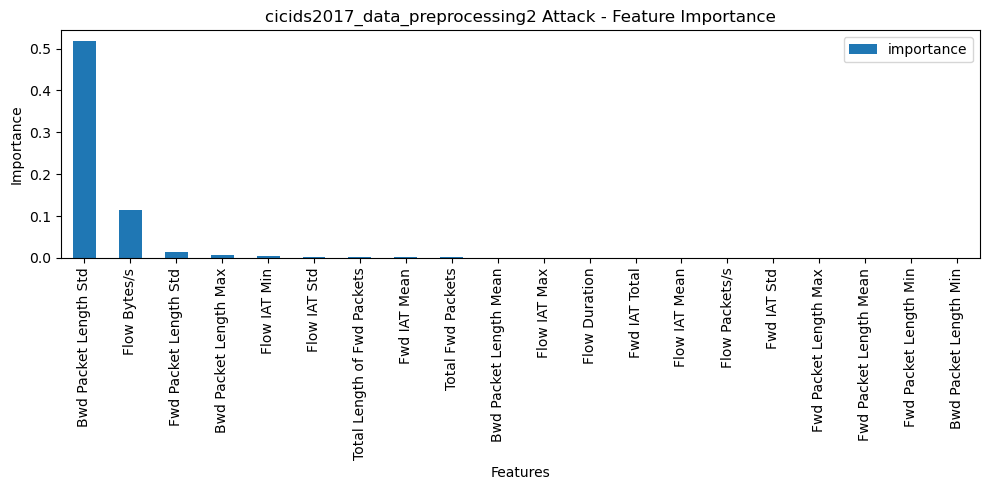

-----------------------------------------------------------------------------------------------




mission accomplished!
Total operation time: =  22464.38459444046 seconds


In [3]:
seconds = time.time()

def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_files = [f for f in os.listdir("/home/wahba/Documents/nids5/test/dataset/3_Full/") if f.endswith(".csv")]

# Headers of column
main_labels = ["Flow Duration","Total Fwd Packets","Total Length of Fwd Packets","Fwd Packet Length Max",
               "Fwd Packet Length Min","Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max",
               "Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std","Flow Bytes/s","Flow Packets/s",
               "Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std",
               "Fwd IAT Max","Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min",
               "Fwd PSH Flags","Fwd URG Flags","Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s",
               "Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std","Packet Length Variance",
               "FIN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","ECE Flag Count",
               "Down/Up Ratio","Average Packet Size","Subflow Fwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward",
               "act_data_pkt_fwd","min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label"]

folder("./feaure_pics/")
for j in csv_files:
    df=pd.read_csv("/home/wahba/Documents/nids5/test/dataset/3_Full/"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
   

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', format = 'pdf')
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")